In [29]:
#Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [30]:
#load Data
df = pd.read_csv('winequality.csv')
print(df.head())

  Type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  Red            7.4              0.70         0.00             1.9   
1  Red            7.8              0.88         0.00             2.6   
2  Red            7.8              0.76         0.04             2.3   
3  Red           11.2              0.28         0.56             1.9   
4  Red            7.4              0.70         0.00             1.9   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.076                 11.0                  34.0   0.9978  3.51   
1      0.098                 25.0                  67.0   0.9968  3.20   
2      0.092                 15.0                  54.0   0.9970  3.26   
3      0.075                 17.0                  60.0   0.9980  3.16   
4      0.076                 11.0                  34.0   0.9978  3.51   

   sulphates  alcohol  quality  
0       0.56      9.4        5  
1       0.68      9.8        5  
2       0.65      9.8  

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


In [33]:
#exploratory of dataset
df.isnull().sum()

Type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

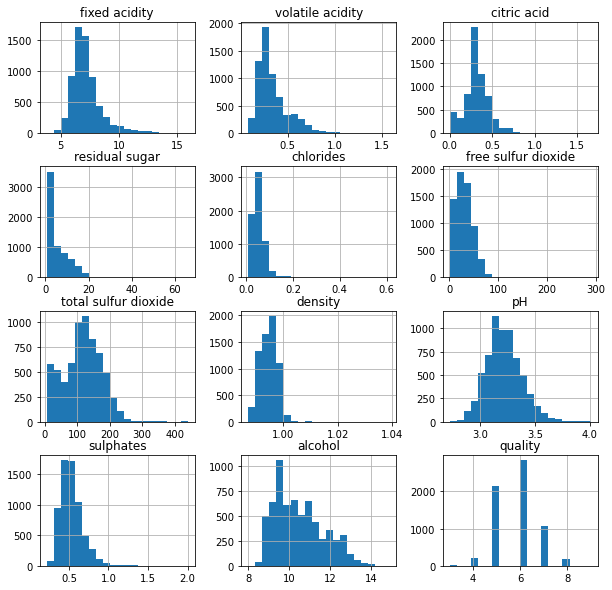

In [34]:
#Vizualization of variables in Dataset
df.hist(bins=20, figsize=(10, 10))
plt.show()

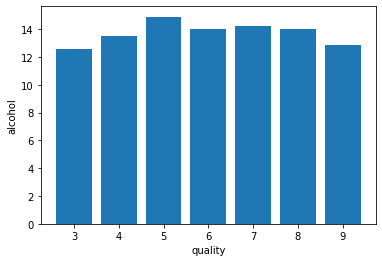

In [35]:
plt.bar(df['quality'], df['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

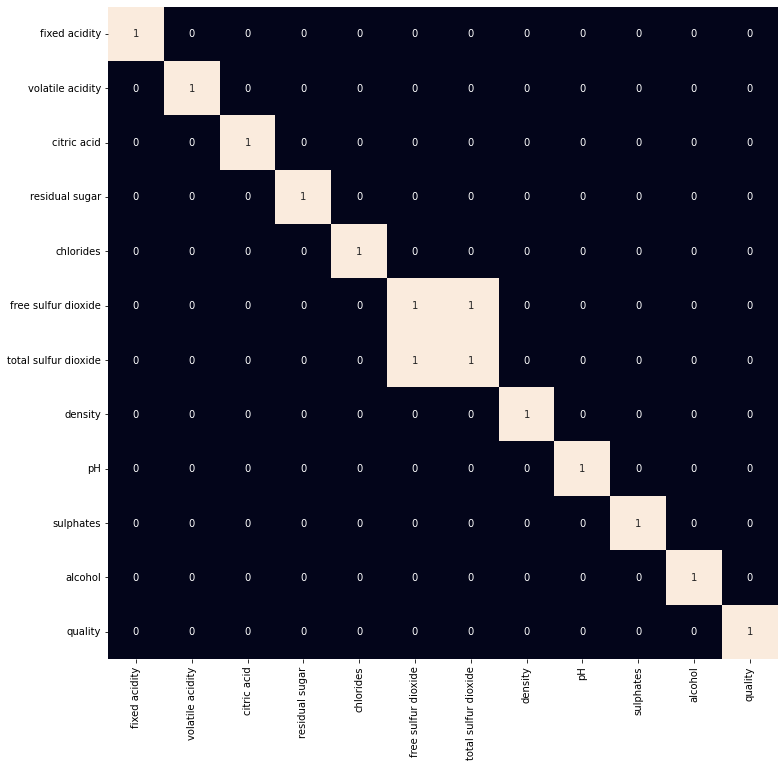

In [36]:
plt.figure(figsize=(12, 12))
sb.heatmap(df.corr() > 0.7, annot=True, cbar=False)
plt.show()

In [37]:
df = df.drop('total sulfur dioxide', axis=1)

In [39]:
df.isna().sum()

Type                   0
fixed acidity          0
volatile acidity       0
citric acid            0
residual sugar         0
chlorides              0
free sulfur dioxide    0
density                0
pH                     0
sulphates              0
alcohol                0
quality                0
best quality           0
dtype: int64

In [40]:
#Model developement
df['best quality'] = [1 if x > 5 else 0 for x in df.quality]

In [46]:
df.replace({'White': 1, 'Red': 0}, inplace=True)
df.head()

,Type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,best quality
0,0,7.4,0.70,0.00,1.9,0.076,11.0,0.9978,3.51,0.56,9.4,5,0
1,0,7.8,0.88,0.00,2.6,0.098,25.0,0.9968,3.20,0.68,9.8,5,0
2,0,7.8,0.76,0.04,2.3,0.092,15.0,0.9970,3.26,0.65,9.8,5,0
3,0,11.2,0.28,0.56,1.9,0.075,17.0,0.9980,3.16,0.58,9.8,6,1
4,0,7.4,0.70,0.00,1.9,0.076,11.0,0.9978,3.51,0.56,9.4,5,0


In [47]:
X = df.drop(['quality', 'best quality'], axis=1)
Y = df['best quality']

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=40)

xtrain.shape, xtest.shape

((5197, 11), (1300, 11))

In [48]:
norm = MinMaxScaler()
xtrain = norm.fit_transform(xtrain)
xtest = norm.transform(xtest)

In [49]:
model = LogisticRegression()
model.fit(xtrain, ytrain)
print(f'{model} : ')
print('Training Accuracy : ', metrics.roc_auc_score(ytrain, model.predict(xtrain)))
print('Validation Accuracy : ', metrics.roc_auc_score(ytest, model.predict(xtest)))

LogisticRegression() : 
Training Accuracy :  0.7042593738884311
Validation Accuracy :  0.6926624715857459


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


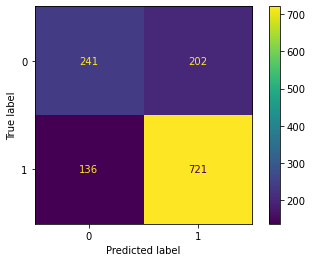

In [51]:
#Model evaluation
metrics.plot_confusion_matrix(model, xtest, ytest)
plt.show()